# Parte 1: creacion de variables, histogramas, kernels y resumen de la base de datos final

In [148]:

df_04 = pd.read_stata('usu_individual_T104.dta')
df_24 = pd.read_excel('usu_individual_T124.xlsx')

t_df_04 = df_04[df_04['region'] == 'Patagónica']
t_df_24 = df_24[df_24['REGION'] == 44] 

t_df_04.columns = t_df_04.columns.str.upper()
t_df_24.columns = t_df_24.columns.str.upper()


df_merged = pd.concat([t_df_04, t_df_24])

df_merged['REGION'] = df_merged['REGION'].replace({44: 'Patagónica'})
df_merged['ESTADO'] = df_merged['ESTADO'].replace({1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo', 4: 'Menor de 10 años'})
df_merged['CH04'] = df_merged['CH04'].replace({1: 'Varón', 2: 'Mujer'})
df_merged['CH12'] = df_merged['CH12'].replace({1: 'Jardín/Preescolar', 2: 'Primario', 3: 'EGB', 4: 'Secundario', 5:'Polimodal', 6:'Terciario', 7:'Universitario', 8:'Posgrado Universitario', 9:'Educación especial (discapacitado)'})
df_merged['CH13'] = df_merged['CH13'].replace({1: 'Sí', 2: 'No'})
df_merged['CH14'] = df_merged['CH14'].str.strip()
df_merged['CH14'] = pd.to_numeric(df_merged['CH14'], errors='coerce')

df_merged

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP,CH05,IMPUTA,PONDIIO,PONDII,PONDIH
42025,125122,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,150.0,...,09,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42026,125969,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,07,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42027,125969,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,120.0,...,07,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42028,126757,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
42029,126757,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Comodoro Rivadavia - Rada Tilly,223.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,1,1,2024.0,1,Patagónica,N,91,128.0,...,7,NaN,NaN,NaN,NaN,1988-03-29 00:00:00,NaN,130.0,129.0,126.0
46029,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,2,1,2024.0,1,Patagónica,N,91,128.0,...,7,NaN,NaN,NaN,NaN,2010-03-10 00:00:00,NaN,128.0,128.0,126.0
46030,TQRMNOQWXHJMKOCDEOHCH00803080,1.0,3,1,2024.0,1,Patagónica,N,91,128.0,...,7,NaN,NaN,NaN,NaN,2012-12-01 00:00:00,NaN,128.0,128.0,126.0
46031,TQRMNOQXQHJMKOCDEOHCH00794205,1.0,1,1,2024.0,1,Patagónica,N,91,131.0,...,4,NaN,NaN,NaN,NaN,1995-03-03 00:00:00,NaN,133.0,133.0,135.0


Crear variable edad2 = edad² //edad = edad?

Panel A: Histograma de edad

Panel B: Gráfico de densidad kernel para empleados vs. desempleados

In [149]:
#removing extremes
df_merged = df_merged[df_merged['CH06'] != 'Menos de 1 año']
df_merged = df_merged[df_merged['CH06'] != '98 y más años']

df_merged['CH06'].astype(float)
df_merged['EDAD2'] = df_merged['CH06'].apply(lambda x: x**2)
df_merged['EDAD'] = df_merged['CH06']

/tmp/ipykernel_40/436315002.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['EDAD2'] = df_merged['CH06'].apply(lambda x: x**2)
/tmp/ipykernel_40/436315002.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['EDAD'] = df_merged['CH06']


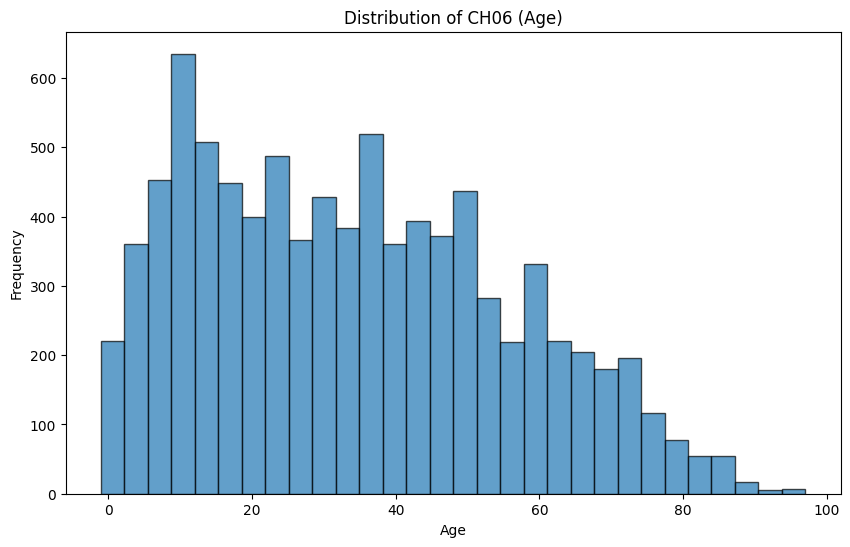

In [150]:

plt.figure(figsize=(10, 6))
plt.hist(df_merged['CH06'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of CH06 (Age)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

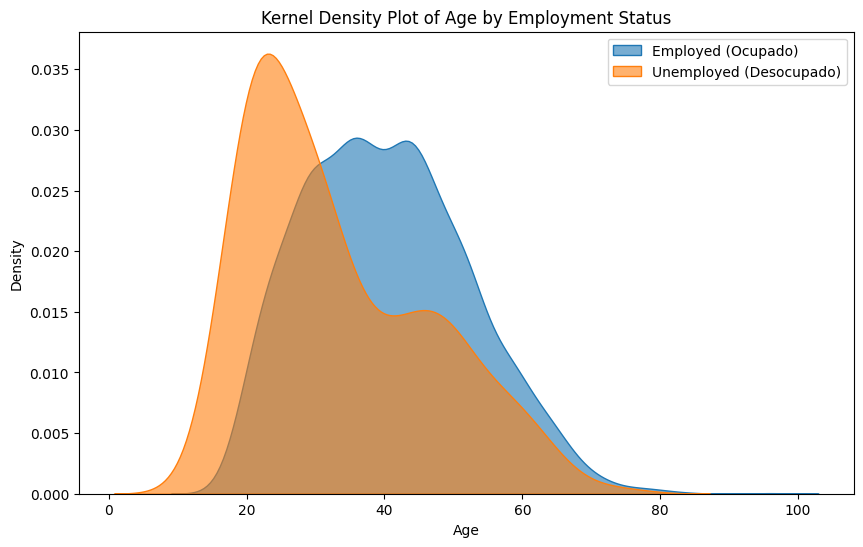

In [151]:

df_employed_unemployed = df_merged[df_merged['ESTADO'].isin(['Ocupado', 'Desocupado'])]


plt.figure(figsize=(10, 6))
sns.kdeplot(df_employed_unemployed[df_employed_unemployed['ESTADO'] == 'Ocupado']['CH06'],
            label='Employed (Ocupado)', fill=True, alpha=0.6)
sns.kdeplot(df_employed_unemployed[df_employed_unemployed['ESTADO'] == 'Desocupado']['CH06'],
            label='Unemployed (Desocupado)', fill=True, alpha=0.6)
plt.title('Kernel Density Plot of Age by Employment Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

Crear la variable educ como años de educación

Utilice las variables CH12, CH13, CH14 para interpretar el nivel educativo

Ejemplo: Si completó “secundaria” (CH12), “sí” en CH13, el año pasado = 6 → educ = 12

In [152]:
def calculate_years_of_education(row):
    # Default value if no education
    years = 0
    
    
    level = row['CH12']
    completed = row['CH13']
    last_year = row['CH14']
    
    
    if pd.isna(level) or level == 0.0:
        return 0
    
    
    if isinstance(level, (int, float)):
        level = str(level)
    
    
    if level == 'Jardín/Preescolar' or level == '1':
        
        years = 0
        if completed == 'Sí' or completed == '1':
            years = 0  
    
    elif level == 'Primario' or level == '2':
        
        if completed == 'Sí' or completed == '1':
            years = 7
        else:
           
            years = min(int(last_year), 7) if not pd.isna(last_year) and last_year not in [98, 99] else 0
    
    elif level == 'EGB' or level == '3':
        
        if completed == 'Sí' or completed == '1':
            years = 9
        else:
           
            years = min(int(last_year), 9) if not pd.isna(last_year) and last_year not in [98, 99] else 0
    
    elif level == 'Secundario' or level == '4':
        
        if completed == 'Sí' or completed == '1':
            years = 12
        else:
            
            years = 7 + min(int(last_year), 5) if not pd.isna(last_year) and last_year not in [98, 99] else 7
    
    elif level == 'Polimodal' or level == '5':
        
        if completed == 'Sí' or completed == '1':
            years = 12
        else:
            
            last_polimodal = int(last_year) if not pd.isna(last_year) and last_year not in [98, 99] else 0
            years = 9 + min(last_polimodal, 3)
    
    elif level == 'Terciario' or level == '6':
        
        if completed == 'Sí' or completed == '1':
            years = 15  
        else:
            
            tertiary_years = int(last_year) if notel == '8':
        
        if completed == 'Sí' or completed == '1':
            years = 19 
        else:
            
            postgrad_years = int(last_year) if not pd.isna(last_year) and last_year not in [98, 99] else 0
            years = 17 + min(postgrad_years, 2) pd.isna(last_year) and last_year not in [98, 99] else 0
            years = 12 + min(tertiary_years, 3)
    
    elif level == 'Universitario' or level == '7':
        
        if completed == 'Sí' or completed == '1':
            years = 17 
        else:
            
            university_years = int(last_year) if not pd.isna(last_year) and last_year not in [98, 99] else 0
            years = 12 + min(university_years, 5)
    
    elif level == 'Posgrado Universitario' or lev
    
    elif level == 'Educación especial (discapacitado)' or level == '9':
    
        years = int(last_year) if not pd.isna(last_year) and last_year not in [98, 99] else 0
    
    return years

In [153]:
df_merged['educ'] = df_merged.apply(calculate_years_of_education, axis=1)
df_merged[['CH12', 'CH13', 'CH14', 'educ']]

/tmp/ipykernel_40/664819721.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['educ'] = df_merged.apply(calculate_years_of_education, axis=1)


,CH12,CH13,CH14,educ
42025,Secundario,No,1.0,8
42026,Primario,Sí,NaN,7
42027,Primario,Sí,NaN,7
42028,Secundario,No,3.0,10
42029,Secundario,No,2.0,9
...,...,...,...,...
46028,Universitario,No,NaN,12
46029,Secundario,No,NaN,7
46030,Primario,No,NaN,0
46031,Terciario,Sí,NaN,15


Crear variable salario_semanal = P21 / 40

Límpielo filtrando valores poco realistas

Crear estadísticas descriptivas (media, desviación estándar, mínima, p50, máxima)

In [154]:

df_merged['salario_semanal'] = df_merged['P21'] / 40

df_merged = df_merged[(df_merged['salario_semanal'] > 0)] # filter out negative and zero values so only people that earn remain

df_merged['salario_semanal'].describe()

/tmp/ipykernel_40/4144347529.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['salario_semanal'] = df_merged['P21'] / 40


count      3233.000000
mean       6809.690094
std        9601.973100
min           0.500000
25%          23.500000
50%        5000.000000
75%       10000.000000
max      250000.000000
Name: salario_semanal, dtype: float64

Crear variable horastrab = total de horas trabajadas

Suma de PP3E_TOT + PP3F_TOT

Proporcionar estadísticas descriptivas

In [162]:
df_merged['horastrab'] = df_merged['PP3E_TOT'] + df_merged['PP3F_TOT']
df_merged['horastrab'].describe()

/tmp/ipykernel_40/1070884795.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['horastrab'] = df_merged['PP3E_TOT'] + df_merged['PP3F_TOT']


count    3233.000000
mean       37.423755
std        19.692637
min         0.000000
25%        25.000000
50%        40.000000
75%        48.000000
max       126.000000
Name: horastrab, dtype: float64

Calcular el tamaño del conjunto de datos por región

Completar la Tabla 1: recuento de observaciones en 2004/2024, valores faltantes, número de variables limpias

# Parte II: Métodos No Supervisados


Crear matriz de correlación con:

edad, edad2, educ, salario_semanal, horastrab

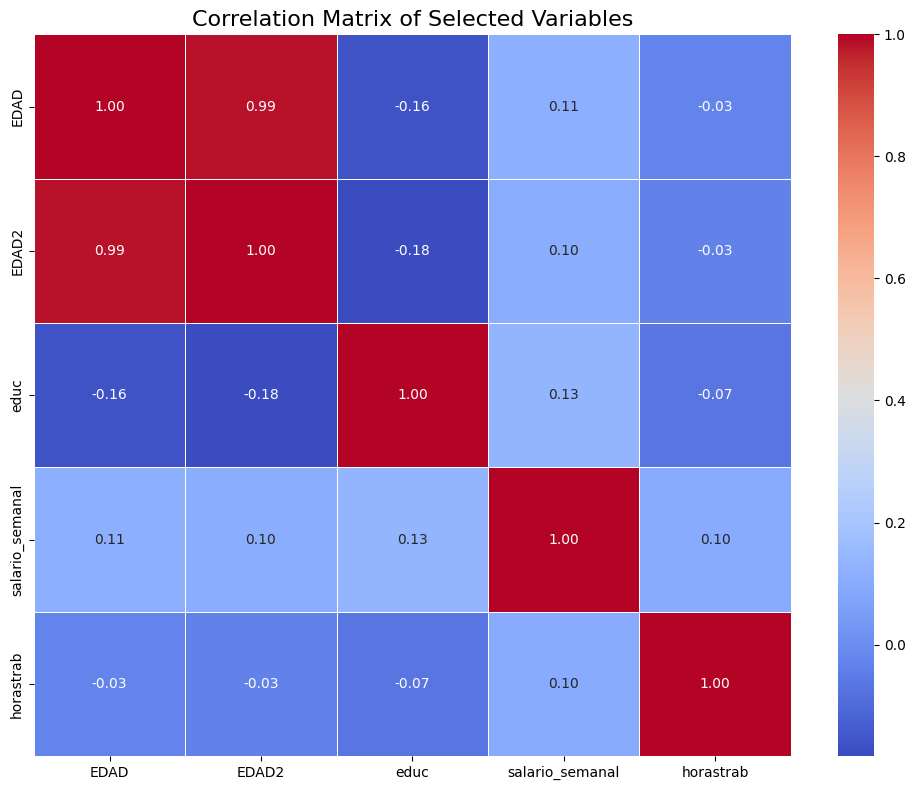

In [165]:

variables = ['EDAD', 'EDAD2', 'educ', 'salario_semanal', 'horastrab']
correlation_matrix = df_merged[variables].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables', fontsize=16)
plt.tight_layout()
plt.show()

Aplicar PCA a las 5 variables

Estandarizarlas primero

Mostrar el primer y segundo componente

In [168]:

X = df_merged[variables].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
principal_components = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=principal_components[:, 0:2], 
                      columns=['PC1', 'PC2'])


print("\nComponent loadings (variable contributions):")
component_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=variables
)
print(component_loadings.iloc[:, 0:2])  # Show only first two components


Component loadings (variable contributions):
                      PC1       PC2
EDAD             0.685813  0.033926
EDAD2            0.687339  0.017262
educ            -0.210222  0.570894
salario_semanal  0.113287  0.780569
horastrab       -0.014088  0.251680


Cargas gráficas (contribuciones de las variables a los componentes)

<Figure size 1000x800 with 0 Axes>

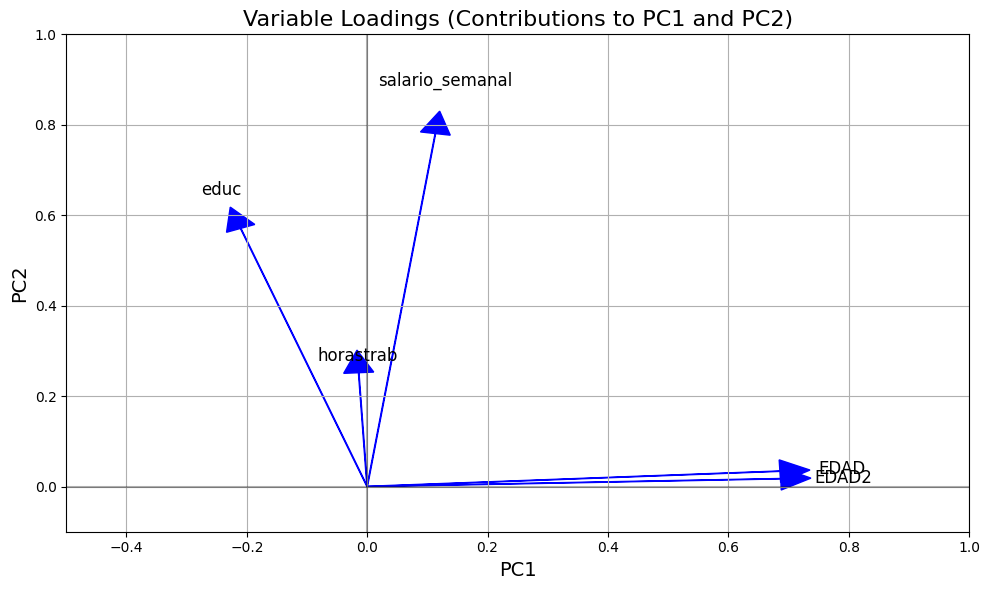

In [186]:
plt.figure(figsize=(10, 8))
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=variables
)


plt.figure(figsize=(10, 6))
for i, var in enumerate(variables):
    plt.arrow(0, 0, loading_matrix.iloc[i, 0], loading_matrix.iloc[i, 1], 
              head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(loading_matrix.iloc[i, 0]*1.15, loading_matrix.iloc[i, 1]*1.15, 
             var, color='black', ha='center', va='center', fontsize=12)

plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-0.5, 1)
plt.ylim(-0.1, 1)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('Variable Loadings (Contributions to PC1 and PC2)', fontsize=16)
plt.tight_layout()
plt.show()

Grafique la proporción de varianza explicada por componente

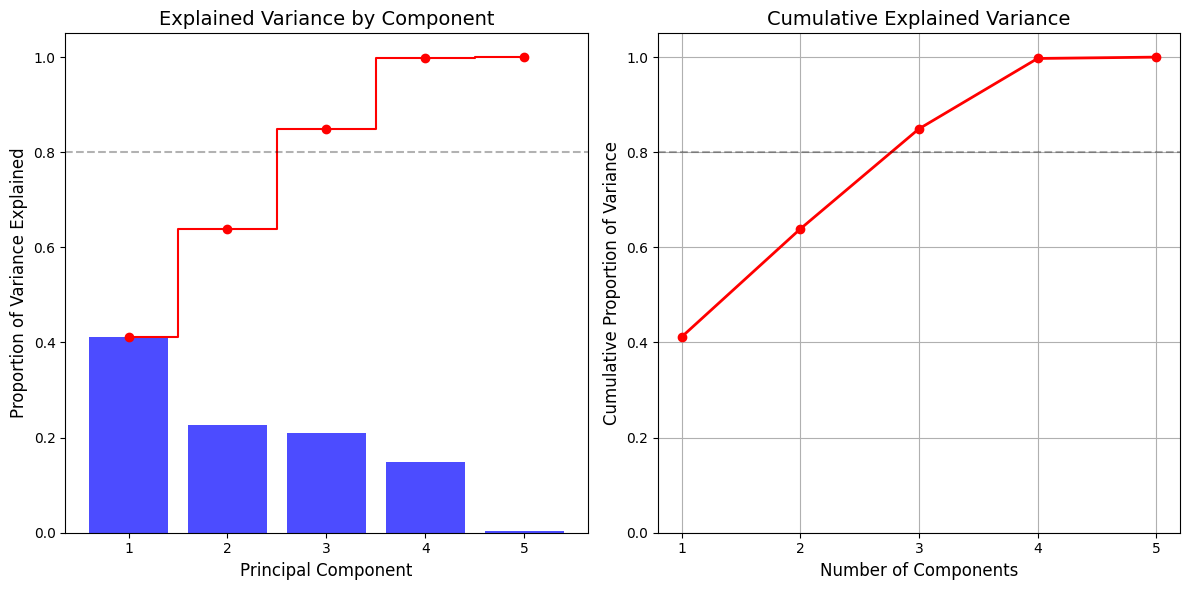

In [189]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', color='red', marker='o')
plt.axhline(y=0.8, color='k', linestyle='--', alpha=0.3)
plt.title('Explained Variance by Component', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1))
plt.ylim(0, 1.05)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'o-', linewidth=2, color='red')
plt.title('Cumulative Explained Variance', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance', fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1))
plt.axhline(y=0.8, color='k', linestyle='--', alpha=0.3)
plt.grid(True)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

## Clustering

Algoritmo K-medias:

Run con k = 2, 4, 10 y n_init = 20

Graficar los resultados con 2 predictores e interpretarlos


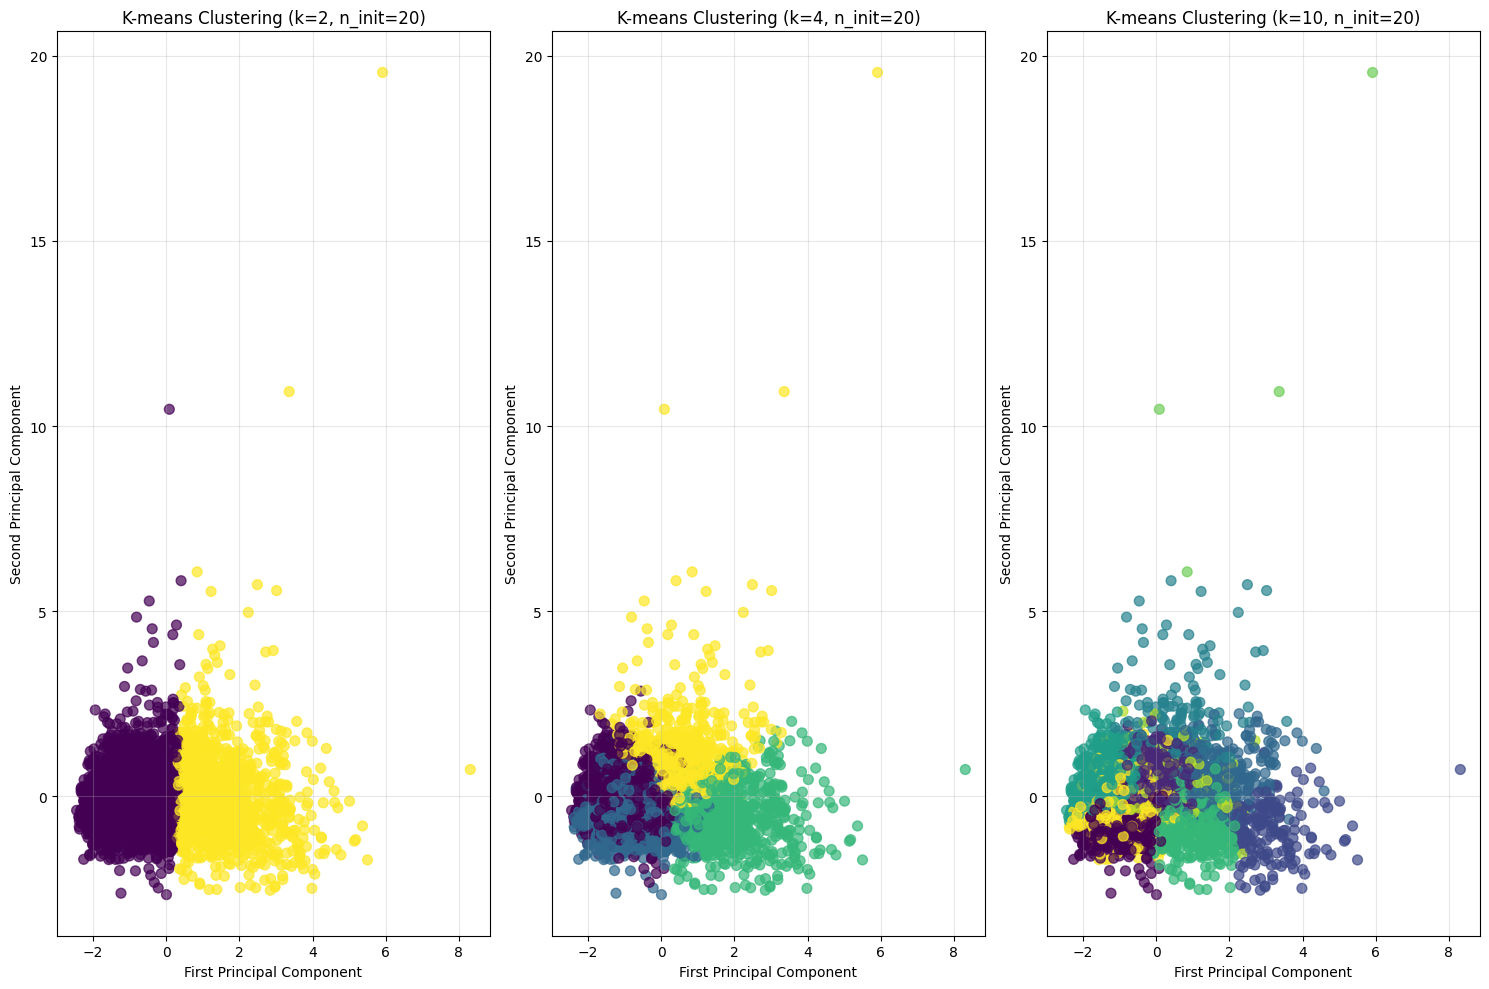

In [198]:

X = df_merged[variables].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


k_values = [2, 4, 10]


plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    
    if k == 2:
        kmeans_k2_labels = labels
    
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'K-means Clustering (k={k}, n_init=20)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Representación gráfica de la edad frente a la educación con resultados k = 2

Utilice el color para empleados/desempleados

Evaluar si la agrupación las separó bien

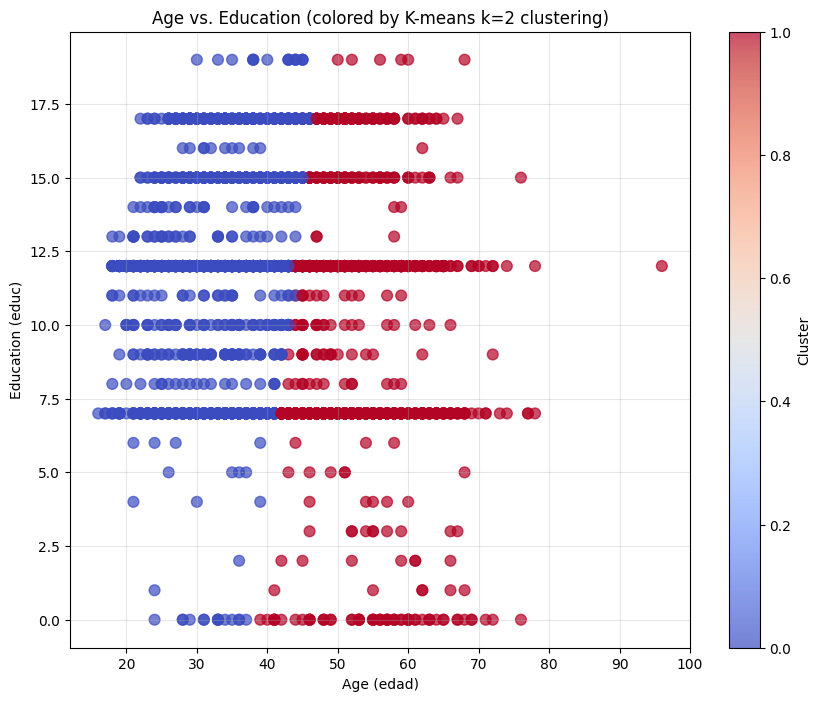

In [210]:

plt.figure(figsize=(10, 8))

plt.scatter(df_merged['EDAD'], df_merged['educ'], c=kmeans_k2_labels, 
            cmap='coolwarm', alpha=0.7, s=60)
plt.title('Age vs. Education (colored by K-means k=2 clustering)')
plt.xlabel('Age (edad)')
plt.ylabel('Education (educ)')
plt.grid(alpha=0.3)
plt.colorbar(label='Cluster')
plt.show()

Agrupamiento jerárquico:

Usa las mismas variables

Crear e interpretar un dendrograma

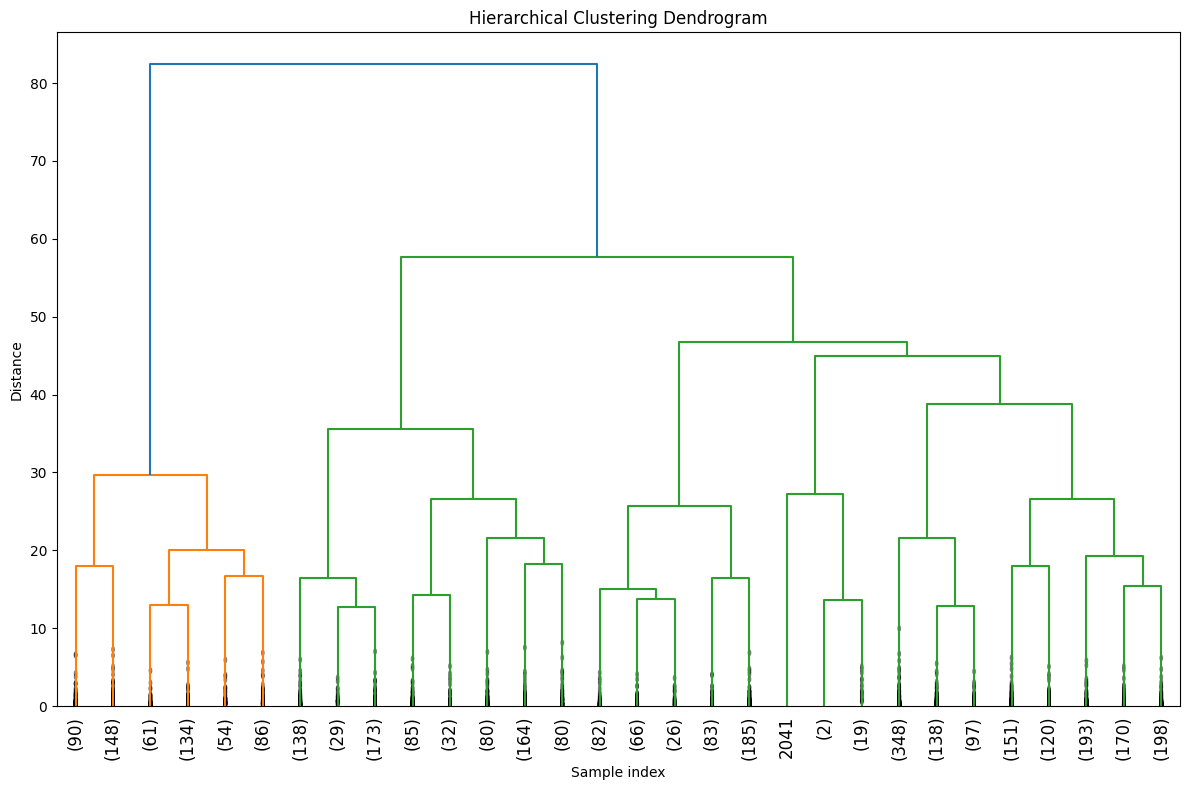

In [213]:

Z = linkage(X_scaled, method='ward')


plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')


if X_scaled.shape[0] > 100:
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=30,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True
    )
else:
    dendrogram(Z)

plt.tight_layout()
plt.show()